# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


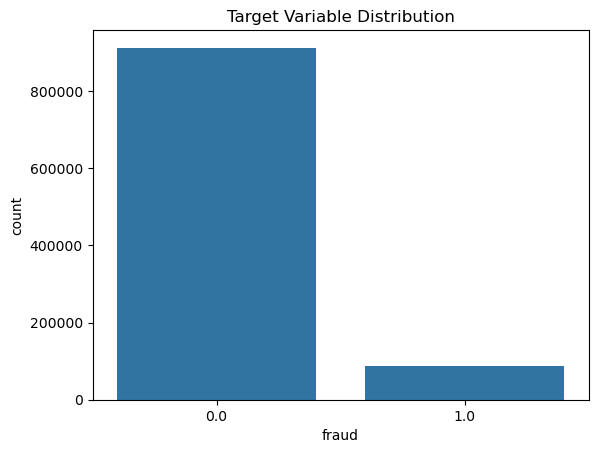

Fraud to Legit ratio: 0.0958
Dataset is imbalanced.


In [19]:
#1 check if dataset is inbalanded

import matplotlib.pyplot as plt
import seaborn as sns

print(fraud['fraud'].value_counts())

# Plot distribution
sns.countplot(x=fraud['fraud'])
plt.title('Target Variable Distribution')
plt.show()

# Simple ratio check
counts = fraud['fraud'].value_counts()
ratio = counts[1] / counts[0]
print(f"Fraud to Legit ratio: {ratio:.4f}")
if ratio < 0.2:
    print("Dataset is imbalanced.")
else:
    print("Dataset is relatively balanced.")

In [20]:
#2 prepare data for modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Scale numerical columns
num_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train/test split (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
#3 evaluate the model

from sklearn.metrics import classification_report, roc_auc_score, f1_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228149
         1.0       0.90      0.60      0.72     21851

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000

F1 Score: 0.7201052689292176
ROC-AUC Score: 0.967187915152832


In [6]:
#4 running oversample

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

model_ros = LogisticRegression(max_iter=1000, random_state=42)
model_ros.fit(X_ros, y_ros)

y_pred_ros = model_ros.predict(X_test)
y_proba_ros = model_ros.predict_proba(X_test)[:, 1]

print("Oversampling Results:")
print(classification_report(y_test, y_pred_ros))
print("F1 Score:", f1_score(y_test, y_pred_ros))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_ros))

Oversampling Results:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228149
         1.0       0.58      0.95      0.72     21851

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

F1 Score: 0.7169047701407866
ROC-AUC Score: 0.9796416868944636


In [18]:
#5 running undersample

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model_rus = LogisticRegression(max_iter=1000, random_state=42)
model_rus.fit(X_rus, y_rus)

y_pred_rus = model_rus.predict(X_test)
y_proba_rus = model_rus.predict_proba(X_test)[:, 1]

print("Undersampling Results:")
print(classification_report(y_test, y_pred_rus))
print("F1 Score:", f1_score(y_test, y_pred_rus))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rus))

Undersampling Results:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228149
         1.0       0.57      0.95      0.72     21851

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

F1 Score: 0.7156754519111357
ROC-AUC Score: 0.9796656436048166


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_smote, y_smote)

y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]

print("SMOTE Results:")
print(classification_report(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_smote))

SMOTE Results:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228149
         1.0       0.58      0.95      0.72     21851

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

F1 Score: 0.7175731130850346
ROC-AUC Score: 0.9795750828628002
